# Objects, Properties and Methods

To summarize, in JS all things that has values or can be assign value is an Object, Properties is a way to get metadata from an Object and a Method is a function that belongs to the father Object that allow you to modify the value of its Object.

## Prototypes

All objects in JS have a prototype and it also have a prototype and so on. So were do we end? 

In [1]:
console.log(Object.getPrototypeOf(Math.max) ==
            Function.prototype);

true


In [2]:
console.log(Object.getPrototypeOf({}) ==
            Object.prototype);

true


In [3]:
console.log(Object.getPrototypeOf(Object.prototype))

null


This is known as Prototype heritage or Prototype chain.

## Classes 

A class define the shape of a type of object, what methods and properties it has.
Lets take the following example:

In [4]:
let meuObjeto = {
    a: 1,
    b: 2,
}
let novoObjeto = meuObjeto
novoObjeto.b = 5
console.log(meuObjeto.b + novoObjeto.b)

10


This code gave 10 as a output because our meuObjeto and novoObjeto reside in the same prototype chain, therefore the same .b propertie.
We can call this an *instance of a class*

To fix that we can use Object.Create propertie to only copy the chain itself to a new chain.

In [5]:
let meuObjeto2 = {
    a: 1,
    b: 2,
}
let novoObjeto2 = Object.create(meuObjeto2)
novoObjeto2.b = 5
console.log(meuObjeto2.b + novoObjeto2.b)

7


Knowing where you are pulling out properties is essencial to evade bottleneck issues and missleading outputs. 
Fortunate Javascript has a method (function) that tells you if the propertie is owned by the object tested.

In [6]:
console.log(meuObjeto.hasOwnProperty('a'))

true


In [7]:
console.log(meuObjeto.hasOwnProperty('map'))

false



So, we learned what a class is and how it behaves.
We also can create a class using the *class* function, as it follows:

In [8]:
class SalaAula {
    constructor(alunos){
    this.alunos = alunos || []
    }
    adicionarAluno(aluno){
        this.alunos.push(aluno)
      }
    }
let minhaSala = new SalaAula (['João','Maria'])
minhaSala.adicionarAluno('Pedro')
console.log(minhaSala.alunos)

[ 'João', 'Maria', 'Pedro' ]


This thipe of function we call a constructor function and by convention we capitalize its name.


To break down the class function we have first the declaration constructor. Constructor its a method that create and inicializes and object created from class, inside a constructor you can add multiple properties. 

When you add a propertie to an object, it will be always store inside the object itself.

#### MAP

Map is a build-in class in javascript, it servers for comparing properties names and values. It has three methods set, get and has.

### SYMBOLS

When you make a symbol the sistem will give it a value, and this value is unique.
You can call a symbol like this:

In [9]:
let sym1 = Symbol('cat');
let sym2 = Symbol('cat');
console.log(sym1===sym2)

false


They are usualy used to serve as identifiers for objects properties.

You can create multiple symbols that have the same intern value using .for method.

In [10]:
let sym3 = Symbol.for('cat');
let sym4 = Symbol.for('cat');
console.log(sym3===sym4)

true


They also used to represent a concept inside a program.

In [11]:
let red = Symbol('red');
function getTrheatLevel(color){
    switch(color){
        case red:
            return 'severe';
    }
}
console.log(getTrheatLevel(red))

severe


The most use case of the Symbol is using them as keys to prevent name clashes, we can think of a environment where we have a sistem of sistem crashes and if a sistem crashses with the same type of error but diferent causes that it can be identified as.

### Iterator

Iterator just means you iterate over something.

In [12]:
let numbers = [1,2,3];
for (n of numbers){
    console.log(n)
}

1
2
3


But you can't iterate like this whit any tipe of object, lets see in this example:

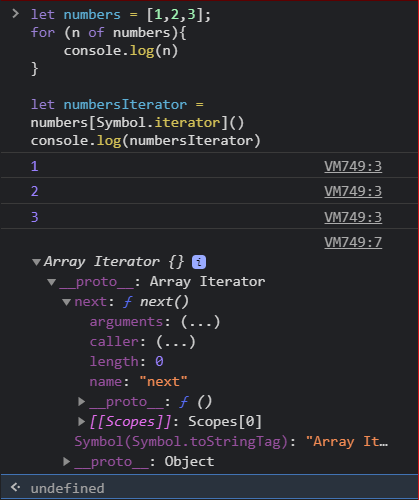

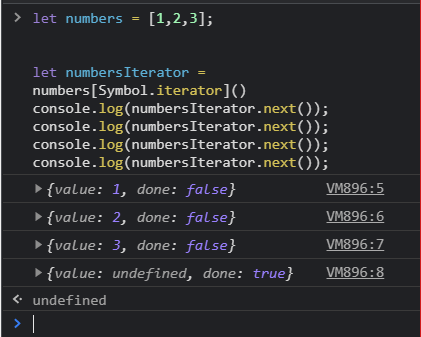

So to breakdown those examples, the only two things we can iterate over using *for...of* is functions and arrays and thats why can see that they have *.next* method in them, this method loops over the values of the object and tells us when the loop can't iterate again saying "true".

Since we are talking about iterators, we know that they are usefull to create all sort of stuff, like matrixes, lists, maps an so on. We also can nest them inside funcitions and other loops.

Here is a basic example of an iterator that creates a matrix:

In [13]:
//construct your class
class Matrix {
  constructor(width, height, element = (x, y) => undefined) {
    this.width = width;
    this.height = height;
    this.content = [];

    for (let y = 0; y < height; y++) {
      for (let x = 0; x < width; x++) {
        this.content[y * width + x] = element(x, y);
      }
    }
  }
  get(x, y) {
    return this.content[y * this.width + x];
  }
  set(x, y, value) {
    this.content[y * this.width + x] = value;
  }
}
//construct your interator
class MatrixIterator {
  constructor(matrix) {
    this.x = 0;
    this.y = 0;
    this.matrix = matrix;
  }

  next() {
    if (this.y == this.matrix.height) return {done: true};

    let value = {x: this.x,
                 y: this.y,
                 value: this.matrix.get(this.x, this.y)};
    this.x++;
    if (this.x == this.matrix.width) {
      this.x = 0;
      this.y++;
    }
    return {value, done: false};
  }
}
//set your class to be iteratable
Matrix.prototype[Symbol.iterator] = function() {
  return new MatrixIterator(this);
};
//call for the interation
let matrix = new Matrix(2, 2, (x, y) => `value ${x},${y}`);
for (let {x, y, value} of matrix) {
  console.log(x, y, value);
}

0 0 'value 0,0'
1 0 'value 1,0'
0 1 'value 0,1'
1 1 'value 1,1'


### GETTERS SETTERS AND STATIC

set and get are similar, the diference is that get method returns the value of the variable name and set takes a parameter and assign it to the name variable and uses the *this* keyword to refer to the current object.
statiC method is used to implement functions that belong to the class but are not associated with any objects of it.

### SUPER CLASSES 

When we need to create a new class that do similar things to the original but has some key changes, we can use the *extends* method, it allows us to create a class that inherits all properties of the father class and make some other other properties.

The sintax is as it follows: 

Why the use of *super*? the *super* call(s) alow the constructor of the father class to exist in the child, this needs to happens because extends only copy its father's properties, not it constructor.

## Exercises

In [ ]:
class Group {
  // Your code here.
}

In [ ]:
// Your code here (and the code from the previous exercise)

In [ ]:
let map = {one: true, two: true, hasOwnProperty: true};